<a href="https://colab.research.google.com/github/singhsourav0/Data-Analytics-Hub/blob/main/AMAZON_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("/content/Amazon Sale Report.csv", low_memory=False)

In [12]:
data.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
86169,86169,405-5811844-8461954,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XXXL,Set,...,INR,824.0,ANUGUL,ODISHA,759122.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
13151,13151,171-5153978-1492300,04-22-22,Shipped,Amazon,Amazon.in,Expedited,J0285,J0285-SKD-XS,Set,...,INR,1432.0,KOLKATA,WEST BENGAL,700103.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
86364,86364,406-3877271-7265116,05-03-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3568,JNE3568-KR-M,kurta,...,INR,399.0,VISAKHAPATNAM,ANDHRA PRADESH,530001.0,IN,NaN,False,NaN,False
119472,119472,402-9539050-7982722,06-07-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-L,Set,...,INR,1163.0,GHAZIABAD,UTTAR PRADESH,201016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
21390,21390,404-3866541-5606750,04-17-22,Shipped,Amazon,Amazon.in,Expedited,SET304,SET304-KR-DPT-XS,Set,...,INR,1115.0,BHUSAWAL,MAHARASHTRA,425201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [13]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [14]:
data.shape

(128975, 24)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [16]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [17]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage.round(2)  # Round to two decimal places
print(null_percentage)

index                  0.00
Order ID               0.00
Date                   0.00
Status                 0.00
Fulfilment             0.00
Sales Channel          0.00
ship-service-level     0.00
Style                  0.00
SKU                    0.00
Category               0.00
Size                   0.00
ASIN                   0.00
Courier Status         5.33
Qty                    0.00
currency               6.04
Amount                 6.04
ship-city              0.03
ship-state             0.03
ship-postal-code       0.03
ship-country           0.03
promotion-ids         38.11
B2B                    0.00
fulfilled-by          69.55
Unnamed: 22           38.03
dtype: float64


In [18]:
threshold = 0.25
# Calculate the percentage of null values in each column
null_percentage = data.isnull().mean()

# Drop columns with more than 25% null values
data_dropped = data.loc[:, null_percentage <= threshold]


In [19]:
data_dropped.shape

(128975, 21)

In [20]:
data_dropped.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [21]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [22]:
data_dropped.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [23]:
print("Column Name       :> Data Type")
for col in data_dropped.columns:
    print(f"{col:<15} :> {data_dropped[col].dtype}")

Column Name       :> Data Type
index           :> int64
Order ID        :> object
Date            :> object
Status          :> object
Fulfilment      :> object
Sales Channel   :> object
ship-service-level :> object
Style           :> object
SKU             :> object
Category        :> object
Size            :> object
ASIN            :> object
Courier Status  :> object
Qty             :> int64
currency        :> object
Amount          :> float64
ship-city       :> object
ship-state      :> object
ship-postal-code :> float64
ship-country    :> object
B2B             :> bool


In [24]:
data2 = data_dropped.dropna()

In [25]:
data2.shape

(116016, 21)

In [26]:
data2['ship-postal-code'] = data2['ship-postal-code'].astype('int')

<ipython-input-26-dfbbffe9b31a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ship-postal-code'] = data2['ship-postal-code'].astype('int')


In [27]:
data2['ship-postal-code'].dtype

dtype('int64')

In [28]:
data2['Date'] = pd.to_datetime(data2['Date'])

<ipython-input-28-356d1685551d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Date'])
<ipython-input-28-356d1685551d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date'] = pd.to_datetime(data2['Date'])


In [29]:
data2.describe()

,index,Date,Qty,Amount,ship-postal-code
count,116016.000000,116016,116016.000000,116016.000000,116016.000000
mean,64647.436897,2022-05-12 14:19:02.407943424,1.003775,649.780849,463314.783969
min,1.000000,2022-03-31 00:00:00,1.000000,0.000000,110001.000000
25%,32554.500000,2022-04-20 00:00:00,1.000000,449.000000,382424.000000
50%,64535.500000,2022-05-10 00:00:00,1.000000,606.000000,500032.000000
75%,96827.250000,2022-06-05 00:00:00,1.000000,788.000000,600017.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,855117.000000
std,37226.107504,NaN,0.072651,282.648892,191105.879250


In [30]:
data2.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country
count,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016,116016
unique,108271,12,2,1,2,1371,7132,9,11,7128,2,1,8499,67,1
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN
freq,12,77580,83621,116016,82705,3676,660,45079,20339,660,109461,116016,10388,20273,116016


In [31]:
data2[['Qty', 'Amount']].describe()

,Qty,Amount
count,116016.000000,116016.000000
mean,1.003775,649.780849
std,0.072651,282.648892
min,1.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,606.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [32]:
data2.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073,IN,False
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,B08YN7XDSG,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102,IN,False
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,B08CMHNWBN,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036,IN,False


In [33]:
data2.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

<ipython-input-63-9d7406242f78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Size', data=data2, color='red', palette='husl')


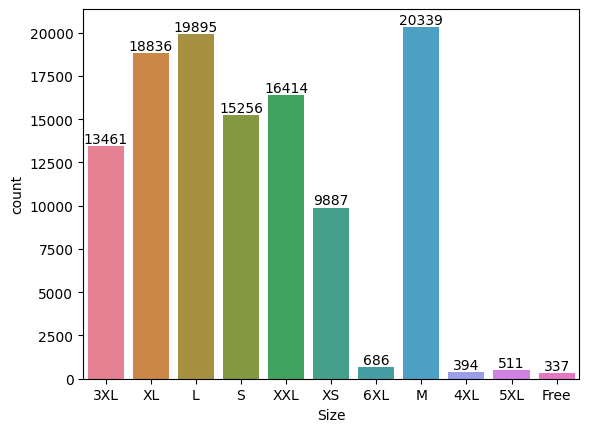

In [63]:
ax = sns.countplot(x = 'Size', data=data2, color='red', palette='husl', hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

# **Figure Summary:**

The most purchased clothing size on Amazon is 'M' (Medium), with 20,339 units sold, representing approximately 17.53% of the total orders. The second most popular size is 'L' (Large), with 19,895 units sold, contributing to 17.14% of the total. Together, these two sizes account for over 34.67% of the 116,016 total orders, highlighting their significant demand among customers.



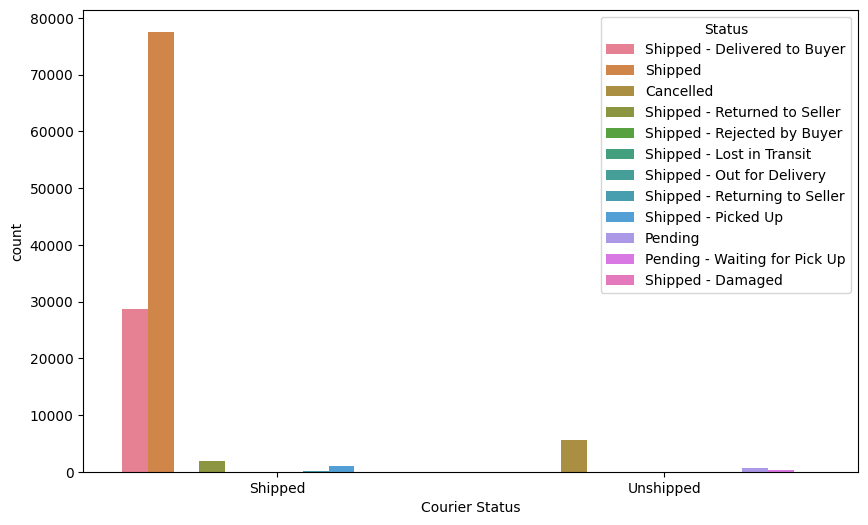

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data= data2, x = 'Courier Status', hue='Status')
plt.show()

In [36]:
order_counts = data2['Status'].value_counts()
print(order_counts)

Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                         5628
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


#Figure summary

The graph shows that the majority of Amazon sales orders are successfully processed, with 'Shipped' (77,580) and 'Shipped - Delivered to Buyer' (28,754) being the most common statuses. Exceptions like 'Cancelled' (5,628) and returns are minimal, highlighting the efficiency of Amazon's logistics.

In [37]:
order_counts = data2.groupby('Status').size()
print(order_counts)

Status
Cancelled                         5628
Pending                            656
Pending - Waiting for Pick Up      281
Shipped                          77580
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28754
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                973
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1947
Shipped - Returning to Seller      145
dtype: int64


In [38]:
data2['Category'].sample(5)


,Category
16063,kurta
127308,Western Dress
28250,kurta
61269,Western Dress
77010,Set


In [39]:
print(data2['Category'].dtypes)

object


In [40]:
data2['Category'] = data2['Category'].astype(str)

<ipython-input-40-45e6a09dba70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Category'] = data2['Category'].astype(str)


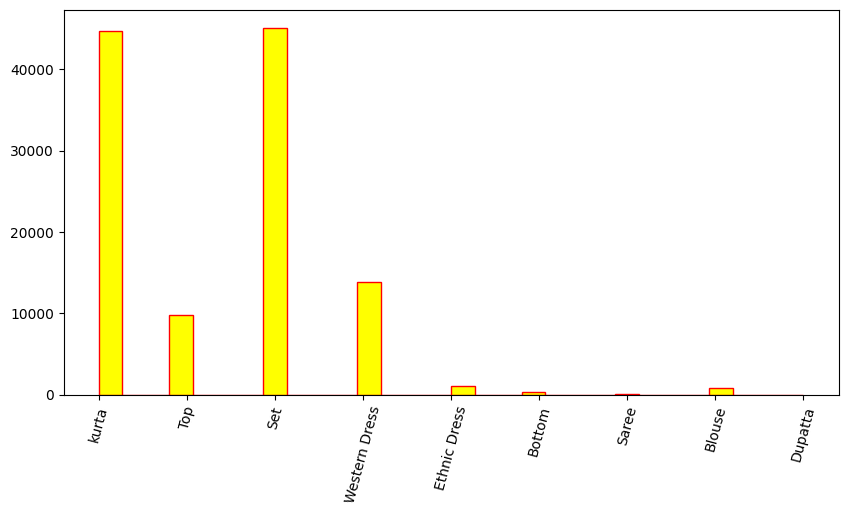

In [72]:
plt.figure(figsize=(10,5))
plt.hist(data2['Category'], bins=30, edgecolor = 'red', color= 'yellow')
plt.xticks(rotation = 75)
plt.show()

In [42]:
order_counts = data2.groupby('Category').size()
print(order_counts)

Category
Blouse             837
Bottom             393
Dupatta              3
Ethnic Dress      1050
Saree              148
Set              45079
Top               9864
Western Dress    13893
kurta            44749
dtype: int64


The graph highlights the distribution of clothing categories in Amazon sales, with 'Set' (45,079) and 'Kurta' (44,749) being the most purchased items, together accounting for a significant majority. Categories like 'Western Dress' (13,893) and 'Top' (9,864) also show notable popularity, while items like 'Dupatta' (3) represent minimal sales.

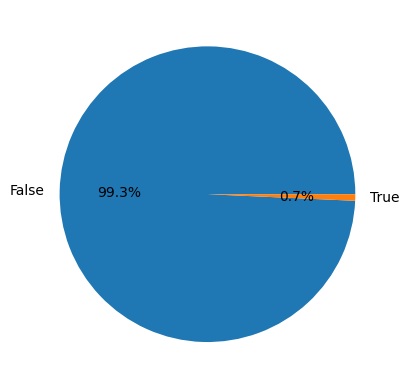

In [47]:
check_b2b = data2['B2B'].value_counts()
plt.pie(check_b2b, labels = check_b2b.index, autopct= '%1.1f%%')
plt.show()

From this chart, it is evident that over 99% of the buyers are retailers, driven by high sales. The minimal contribution from other categories such as 'Dupatta' reflects a very small fraction of wholesale buyers.

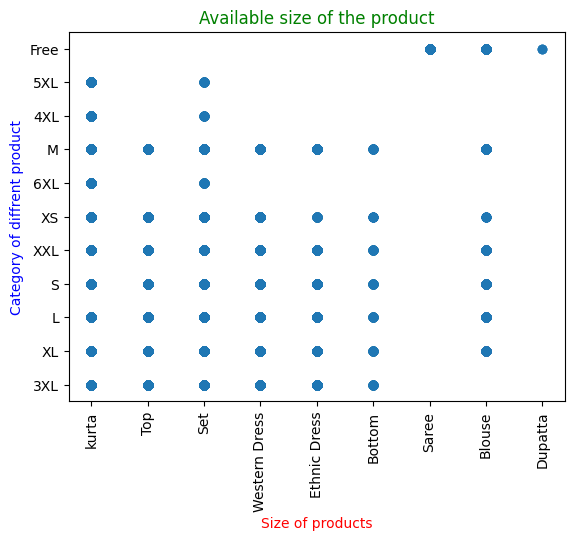

In [52]:
x_data = data2['Category']
y_data = data2['Size']

plt.scatter(x_data, y_data)
plt.xlabel('Size of products', color = 'Red')
plt.ylabel('Category of diffrent product', color = 'blue')
plt.title('Available size of the product', color = 'green')
plt.xticks(rotation = 90)
plt.show()

<ipython-input-73-0fd48800b45d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data2[data2['ship-state'].isin(state_10.index)], x ='ship-state',  palette='viridis', width=0.5 )


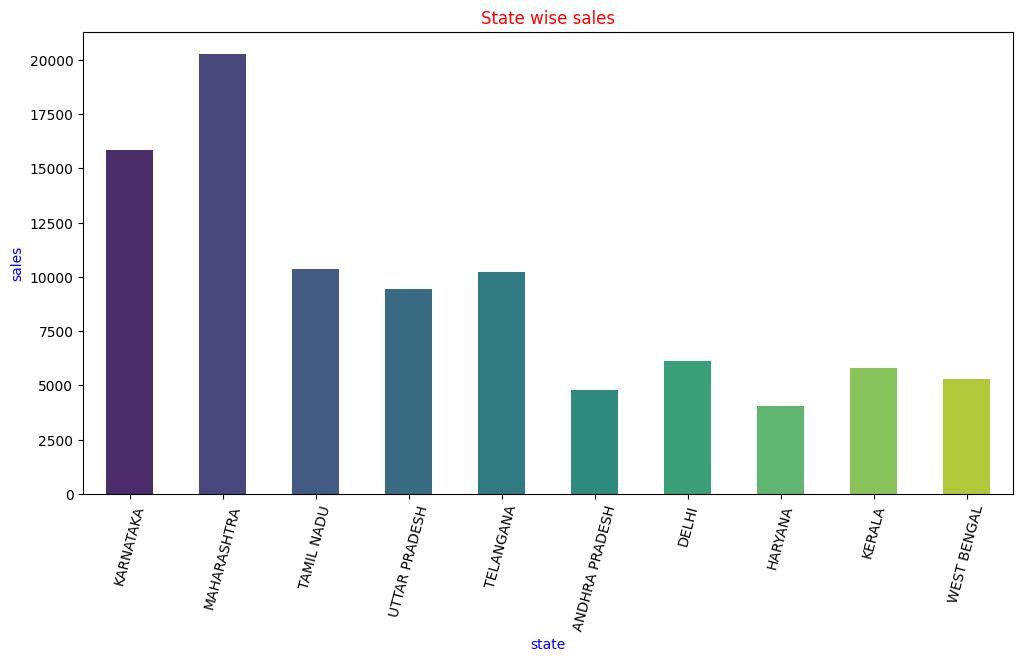

In [73]:
state_10 = data2['ship-state'].value_counts().head(10)
plt.figure(figsize = (12,6))
sns.countplot(data = data2[data2['ship-state'].isin(state_10.index)], x ='ship-state',  palette='viridis', width=0.5 )
plt.xlabel("state", color = 'blue')
plt.ylabel('sales', color = 'blue')
plt.xticks(rotation = 90)
plt.title("State wise sales", color= "red")
plt.xticks(rotation =75)
plt.show()

"Maharashtra has the highest sales, followed by Karnataka, making them the top-performing states in sales distribution."